In [2]:
# %%capture
import torch
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

from NashRL import *
# from nashRL_netlib import *
from NashAgent_lib import *
from textwrap import wrap
from visualization import *
            
#Initialize a dummy agent
num_players = 5           # Total number of agents
T = 15                    # Total number of time steps

#Default simulation parameters
sim_dict = {'perm_price_impact': .3,
            'transaction_cost': .5,
            'liquidation_cost': .5,
            'running_penalty': 0,
            'T': T,
            'dt': 1,
            'N_agents': num_players,
            'drift_function': (lambda x, y: 0.1*(10-y)),
            'volatility': 1,
            'initial_price_var': 20}


sim_obj = MarketSimulator(sim_dict)
net_non_inv_dim = len(sim_obj.get_state()[0].to_numpy())
net_non_inv_dim -= sim_obj.N-1
out_dim = 4

nash_agent = NashNN(non_invar_dim=net_non_inv_dim,n_players=sim_obj.N,
                    output_dim=4, max_steps=T, trans_cost=0.5, 
                    terminal_cost=0.5, num_moms=5)

#Load saved network parameters from file
# net_file_name = "Action_Net"
net_file_name = "./ADA_Trained_Files/Action_Net_ADA.pt"

nash_agent.action_net.load_state_dict(torch.load(net_file_name))


./ADA_Trained_Files/Action_Net_ADA.pt
OrderedDict([('moment_encoder_net.0.weight', tensor([[-2.9879e-03],
        [-5.8309e-03],
        [ 6.2639e-04],
        [-5.2099e-03],
        [-7.7404e-03],
        [ 6.2066e-02],
        [ 3.3555e-04],
        [ 1.3924e-03],
        [ 1.2100e-03],
        [ 1.3826e-04],
        [-1.9542e-02],
        [-3.3678e-04],
        [-1.5260e-04],
        [-1.1724e-03],
        [-2.5816e-04],
        [ 6.7711e-03],
        [ 2.4648e-05],
        [-3.4667e-04],
        [-5.2403e-05],
        [-2.6698e-01],
        [-5.5821e-04],
        [-9.9301e-02],
        [-2.0721e-03],
        [ 3.4612e-02],
        [ 3.8180e-03]])), ('moment_encoder_net.0.bias', tensor([-0.1463, -1.1579, -0.3957, -0.8901, -0.4358, -5.5093, -0.0313, -0.2216,
        -0.1571, -0.0790, -1.0117, -0.0524, -0.1379, -0.0940, -0.0207, -0.4241,
        -0.0149, -0.0213, -0.0125,  1.7859, -0.0279, -4.9784, -0.1135, -4.0361,
        -0.2747])), ('moment_encoder_net.2.weight', tensor([[ 1.7908e

In [2]:
nash_agent.action_net.eval()
current_state, _, _ = sim_obj.get_state()
current_state
# nash_agent.predict_action([current_state])[0].mu

State(t=15.0, p=10.781165, i=-0.2568257229505072, q=array([ 26.20284279, -34.87144569,  24.10643122, -20.28451223,
        19.8994923 ]))

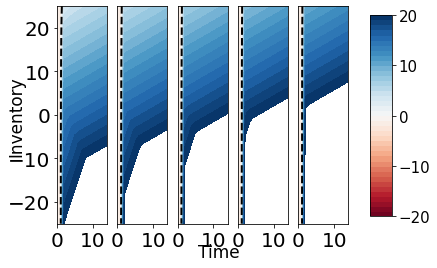

In [10]:
#Output Heatmap when other agent's average inventory is low
heatmap_old(net=nash_agent,t_step=15,q_step=50,p_step=5,t_range=[0,14],
            q_range=[-25,25],p_range=[6,14],n_agents = num_players, other_agent_inv = -20,i_val=0)

In [13]:
#Output Heatmap when other agent's average inventory is zero
heatmap_old(net=nash_agent,t_step=15,q_step=50,p_step=5,t_range=[0,14],
            q_range=[-25,25],p_range=[6,14],nump = num_players, other_agent_inv = 0)

TypeError: __new__() missing 1 required positional argument: 'q'

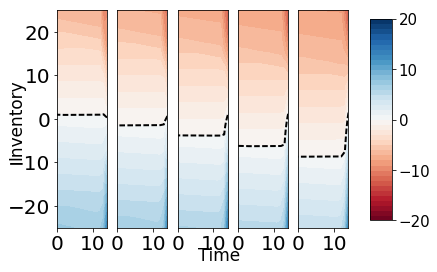

In [4]:
#Output Heatmap when other agent's average inventory is zero
heatmap_old(net=nash_agent,t_step=15,q_step=50,p_step=5,t_range=[0,14],
            q_range=[-25,25],p_range=[6,14],nump = num_players, other_agent_inv = 20)

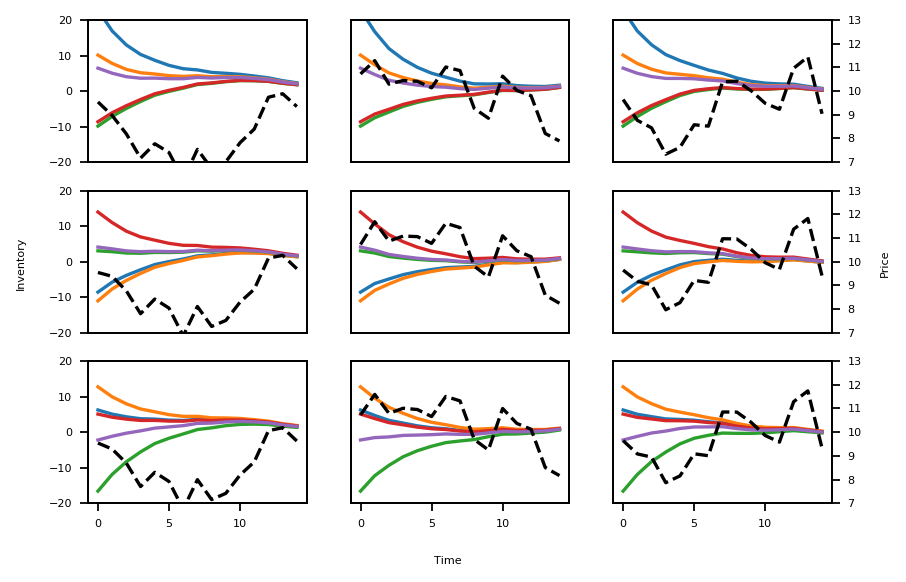

In [5]:
#Generates fixed paths (fixing starting inventory levels horizontally or fixing price paths vertically)
seed = 33333
np.random.seed(seed)
fixed_sample_paths(nash_agent,9,num_players,15, sim_dict,seed)